In [141]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import netCDF4 as nc
import xarray as xr
import metpy
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import matplotlib.pyplot as plt

# import dask.distributed as dsk
# clnt = dsk.Client()
# clnt

In [142]:
cape = xr.open_dataset('/g/data/up6/gs5098/cdo/CAPE/cape_combined.nc')
temp = xr.open_dataset('/g/data/up6/gs5098/cdo/air_temp/air-temp-combine.nc')
# gust = xr.open_dataset('/g/data/up6/gs5098/cdo/max_gust10m/maxgust-hourly.nc')
relh = xr.open_dataset('/g/data/up6/gs5098/cdo/rel_hum/rel-hum-combine.nc')
uwnd = xr.open_dataset('/g/data/up6/gs5098/cdo/u_wind/u-wind-combine.nc')
vwnd = xr.open_dataset('/g/data/up6/gs5098/cdo/v_wind/v-wind-combine.nc')
ttot = xr.open_dataset('/g/data/up6/gs5098/cdo/Total_Totals/sy_tt.nc')

In [143]:
temp1 = temp.reindex(pressure=temp.pressure[::-1])

In [144]:
#cape_2009.mean(dim={"time"}).CAPE[0,:,:].plot()

In [145]:
#cape_2009.mean(dim={"time"}).isel(pressure=slice(0,3)).mean(dim={"pressure"}).CAPE[:,:].plot()

In [146]:
#Assigning coordinates

cape["latitude"]=temp['latitude']
cape["longitude"]=temp['longitude']
cape["time"]=temp['time']
cape["pressure"]=temp1['pressure']

In [147]:
#cape_2009.mean(dim={"time"}).sel(pressure=slice(1000,900)).mean(dim={"pressure"}).CAPE[:,:].plot()

In [148]:
#new = cape_2009.reindex(pressure = list(reversed(cape_2009.pressure)))


In [149]:
rich_cape1 = cape.sel(longitude=150.75, latitude= -33.62, method='nearest')
rich_cape1

<xarray.Dataset>
Dimensions:    (time: 17673, pressure: 21)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01T04:00:00 ... 2019-02-28T08:00:00
    latitude   float32 -33.62
    longitude  float32 150.7
  * pressure   (pressure) float32 1e+03 975.0 950.0 925.0 ... 30.0 20.0 10.0
Data variables:
    MLCAPE     (time) float32 ...
    CAPE       (time, pressure) float32 ...
Attributes:
    CDI:              Climate Data Interface version 2.1.0 (https://mpimet.mp...
    Conventions:      CF-1.6
    description:      MLCAPE calculated with wrf_cape_3d (lowest output)
    calculated_by:    NSW Department of Planning and Environment
    email:            fei.ji@environment.nsw.gov.au
    date_calculated:  Wed Jan 18 01:32:10 AEDT 2023
    history:          Wed Jan 18 13:41:04 2023: cdo -r -f nc4 mergetime /g/da...
    CDO:              Climate Data Operators version 2.1.0 (https://mpimet.mp...

In [150]:
# rich_cape2 = cape.sel(longitude=150.75, latitude= -33.62, pressure = 1000, method='nearest')
# rich_cape2

In [151]:
#rich_cape = rich_cape1.fillna(0)

In [152]:
# rich_cape2 = rich_cape1.dropna(dim='time')
# rich_cape2

In [153]:
# tas = rich_cape.CAPE
# rich_cape3 = tas.where(tas.time!=tas.time[59], drop=True)

In [154]:
#station data_(2009-2019)

In [155]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import netCDF4 as nc
import xarray as xr
import metpy
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import matplotlib.pyplot as plt

In [156]:
df = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/Richmond_HD01D_Data_067105_HourlyMaxWG.txt")
df

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,MM,DD,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h
0,1998,12,4,5,52,12,4,15,52,40.7
1,1998,12,4,6,16,12,4,16,16,38.9
2,1998,12,4,7,4,12,4,17,4,37.1
3,1998,12,4,8,2,12,4,18,2,29.5
4,1998,12,4,9,35,12,4,19,35,22.3
...,...,...,...,...,...,...,...,...,...,...
175739,2021,11,1,1,38,11,1,11,38,20.5
175740,2021,11,1,2,6,11,1,12,6,20.5
175741,2021,11,1,3,13,11,1,13,13,18.4
175742,2021,11,1,4,18,11,1,14,18,18.4


In [157]:
df['HH24_1'].describe()

count    175744.000000
mean         10.885595
std           7.030774
min           0.000000
25%           5.000000
50%          10.000000
75%          17.000000
max          23.000000
Name: HH24_1, dtype: float64

In [158]:
df = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/Richmond_HD01D_Data_067105_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])


In [159]:
df['YearMonthDayHourMinutesInYYYY'].describe()

count    175744.000000
mean       2009.817365
std           6.693470
min        1998.000000
25%        2004.000000
50%        2010.000000
75%        2016.000000
max        2021.000000
Name: YearMonthDayHourMinutesInYYYY, dtype: float64

In [160]:
df1=df[df['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]
# df3.drop(df3.tail(31).index,
#           inplace = True)


In [161]:
# dd = df4[df4['MaxHourlyGustInKm_h']>=90]
# dd

In [162]:
test3 = df4
test3["MaxHourlyGustInm_s"] = df4['MaxHourlyGustInKm_h']* 5/18
test3["MaxHourlyGustInm_s"]

/jobfs/70073792.gadi-pbs/ipykernel_1188558/2955514473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3["MaxHourlyGustInm_s"] = df4['MaxHourlyGustInKm_h']* 5/18


16926      6.694444
16927      6.194444
16928      5.111111
16929      6.194444
16930      7.194444
            ...    
161709     9.305556
161710     7.194444
161711     8.694444
161712    19.000000
161713    19.000000
Name: MaxHourlyGustInm_s, Length: 18162, dtype: float64

In [163]:
df5=df4.reset_index(drop=True)

In [164]:
len(df5.index)

18162

In [165]:
test = df5
test["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18

In [166]:
import datetime
test["Time"] = test["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test["MM_1"].astype(str) + "-" + test["DD_1"].astype(str) + "T" + test['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test["clean_time"] = test["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

In [167]:
test

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time
0,2001,1,1,1,27,11,27,24.1,6.694444,2001-1-1T1:00:00,2001-01-01 01:00:00
1,2001,1,1,2,0,12,0,22.3,6.194444,2001-1-1T2:00:00,2001-01-01 02:00:00
2,2001,1,1,3,39,13,39,18.4,5.111111,2001-1-1T3:00:00,2001-01-01 03:00:00
3,2001,1,1,4,37,14,37,22.3,6.194444,2001-1-1T4:00:00,2001-01-01 04:00:00
4,2001,1,1,5,46,15,46,25.9,7.194444,2001-1-1T5:00:00,2001-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
18157,2019,12,31,4,16,14,16,33.5,9.305556,2019-12-31T4:00:00,2019-12-31 04:00:00
18158,2019,12,31,5,57,15,57,25.9,7.194444,2019-12-31T5:00:00,2019-12-31 05:00:00
18159,2019,12,31,6,8,16,8,31.3,8.694444,2019-12-31T6:00:00,2019-12-31 06:00:00
18160,2019,12,31,7,49,17,49,68.4,19.000000,2019-12-31T7:00:00,2019-12-31 07:00:00


In [168]:
#pandas df for cape

df_rimlcape = pd.DataFrame({'barra_time': rich_cape1['time'],'mlcape': rich_cape1['MLCAPE']})
print(df_rimlcape)


               barra_time      mlcape
0     2001-01-01 04:00:00         NaN
1     2001-01-01 05:00:00         NaN
2     2001-01-01 06:00:00         NaN
3     2001-01-01 07:00:00         NaN
4     2001-01-01 08:00:00         NaN
...                   ...         ...
17668 2019-02-28 04:00:00         NaN
17669 2019-02-28 05:00:00         NaN
17670 2019-02-28 06:00:00         NaN
17671 2019-02-28 07:00:00  205.074402
17672 2019-02-28 08:00:00  137.201660

[17673 rows x 2 columns]


In [169]:
new_frame_rimlcape = test.merge(df_rimlcape,how='left', left_on='clean_time', right_on='barra_time')
new_frame_rimlcape

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,mlcape
0,2001,1,1,1,27,11,27,24.1,6.694444,2001-1-1T1:00:00,2001-01-01 01:00:00,NaT,NaN
1,2001,1,1,2,0,12,0,22.3,6.194444,2001-1-1T2:00:00,2001-01-01 02:00:00,NaT,NaN
2,2001,1,1,3,39,13,39,18.4,5.111111,2001-1-1T3:00:00,2001-01-01 03:00:00,NaT,NaN
3,2001,1,1,4,37,14,37,22.3,6.194444,2001-1-1T4:00:00,2001-01-01 04:00:00,2001-01-01 04:00:00,NaN
4,2001,1,1,5,46,15,46,25.9,7.194444,2001-1-1T5:00:00,2001-01-01 05:00:00,2001-01-01 05:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18157,2019,12,31,4,16,14,16,33.5,9.305556,2019-12-31T4:00:00,2019-12-31 04:00:00,NaT,NaN
18158,2019,12,31,5,57,15,57,25.9,7.194444,2019-12-31T5:00:00,2019-12-31 05:00:00,NaT,NaN
18159,2019,12,31,6,8,16,8,31.3,8.694444,2019-12-31T6:00:00,2019-12-31 06:00:00,NaT,NaN
18160,2019,12,31,7,49,17,49,68.4,19.000000,2019-12-31T7:00:00,2019-12-31 07:00:00,NaT,NaN


In [170]:
ri_mlcape_new = new_frame_rimlcape.dropna()
ri_mlcape_new

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,mlcape
14,2001,1,2,7,34,17,34,37.1,10.305556,2001-1-2T7:00:00,2001-01-02 07:00:00,2001-01-02 07:00:00,327.865784
15,2001,1,2,8,7,18,7,27.7,7.694444,2001-1-2T8:00:00,2001-01-02 08:00:00,2001-01-02 08:00:00,151.481491
16,2001,1,3,1,32,11,32,14.8,4.111111,2001-1-3T1:00:00,2001-01-03 01:00:00,2001-01-03 01:00:00,25.779581
20,2001,1,3,5,59,15,59,33.5,9.305556,2001-1-3T5:00:00,2001-01-03 05:00:00,2001-01-03 05:00:00,1.548150
21,2001,1,3,6,7,16,7,35.3,9.805556,2001-1-3T6:00:00,2001-01-03 06:00:00,2001-01-03 06:00:00,188.622787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17666,2019,2,28,1,6,11,6,24.1,6.694444,2019-2-28T1:00:00,2019-02-28 01:00:00,2019-02-28 01:00:00,39.127605
17667,2019,2,28,2,32,12,32,31.3,8.694444,2019-2-28T2:00:00,2019-02-28 02:00:00,2019-02-28 02:00:00,7.564521
17668,2019,2,28,3,53,13,53,27.7,7.694444,2019-2-28T3:00:00,2019-02-28 03:00:00,2019-02-28 03:00:00,10.326315
17672,2019,2,28,7,11,17,11,31.3,8.694444,2019-2-28T7:00:00,2019-02-28 07:00:00,2019-02-28 07:00:00,205.074402


In [171]:
ri_scatter1 = ri_mlcape_new[ri_mlcape_new['MaxHourlyGustInm_s']>=25]
ri_scatter1

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,mlcape
611,2001,11,18,4,53,14,53,111.2,30.888889,2001-11-18T4:00:00,2001-11-18 04:00:00,2001-11-18 04:00:00,1102.942871
612,2001,11,18,5,2,15,2,101.9,28.305556,2001-11-18T5:00:00,2001-11-18 05:00:00,2001-11-18 05:00:00,4.120453
729,2001,12,3,2,43,12,43,174.2,48.388889,2001-12-3T2:00:00,2001-12-03 02:00:00,2001-12-03 02:00:00,657.066895
4382,2005,11,10,5,25,15,25,94.3,26.194444,2005-11-10T5:00:00,2005-11-10 05:00:00,2005-11-10 05:00:00,1403.946655


/jobfs/70073792.gadi-pbs/ipykernel_1188558/3016170861.py:13: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


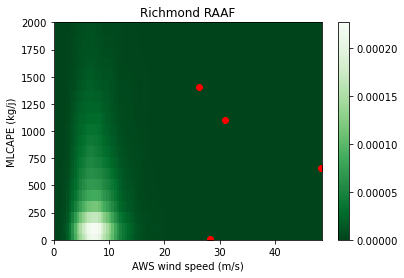

In [172]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
y = ri_mlcape_new['mlcape']
x = ri_mlcape_new['MaxHourlyGustInm_s']

 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
 #Change color palette

plt.ylim([0,2000])
plt.xlim([0,48.4])
plt.ylabel('MLCAPE (kg/j)')
plt.xlabel('AWS wind speed (m/s)')
plt.title('Richmond RAAF')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)
plt.colorbar()
plt.scatter(ri_scatter1['MaxHourlyGustInm_s'], ri_scatter1['mlcape'], color = 'red')
plt.show()

In [173]:
#df for S06
ri_s06 = xr.open_dataset('/g/data/up6/gs5098/cdo/S06/ri_s06.nc')

df_ris06 = pd.DataFrame({'barra_time': ri_s06['time'],'ri_s06': ri_s06['ri_s06']})
print(df_ris06)


               barra_time    ri_s06
0     2001-01-01 04:00:00  1.277091
1     2001-01-01 05:00:00  0.889296
2     2001-01-01 06:00:00  2.627644
3     2001-01-01 07:00:00  4.217251
4     2001-01-01 08:00:00  5.316803
...                   ...       ...
17668 2019-02-28 04:00:00  1.184152
17669 2019-02-28 05:00:00  2.105615
17670 2019-02-28 06:00:00  2.184763
17671 2019-02-28 07:00:00  4.719465
17672 2019-02-28 08:00:00  4.040868

[17673 rows x 2 columns]


In [174]:
new_frame_ris06 = test.merge(df_ris06,how='left', left_on='clean_time', right_on='barra_time')
new_frame_ris06

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,ri_s06
0,2001,1,1,1,27,11,27,24.1,6.694444,2001-1-1T1:00:00,2001-01-01 01:00:00,NaT,NaN
1,2001,1,1,2,0,12,0,22.3,6.194444,2001-1-1T2:00:00,2001-01-01 02:00:00,NaT,NaN
2,2001,1,1,3,39,13,39,18.4,5.111111,2001-1-1T3:00:00,2001-01-01 03:00:00,NaT,NaN
3,2001,1,1,4,37,14,37,22.3,6.194444,2001-1-1T4:00:00,2001-01-01 04:00:00,2001-01-01 04:00:00,1.277091
4,2001,1,1,5,46,15,46,25.9,7.194444,2001-1-1T5:00:00,2001-01-01 05:00:00,2001-01-01 05:00:00,0.889296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18157,2019,12,31,4,16,14,16,33.5,9.305556,2019-12-31T4:00:00,2019-12-31 04:00:00,NaT,NaN
18158,2019,12,31,5,57,15,57,25.9,7.194444,2019-12-31T5:00:00,2019-12-31 05:00:00,NaT,NaN
18159,2019,12,31,6,8,16,8,31.3,8.694444,2019-12-31T6:00:00,2019-12-31 06:00:00,NaT,NaN
18160,2019,12,31,7,49,17,49,68.4,19.000000,2019-12-31T7:00:00,2019-12-31 07:00:00,NaT,NaN


In [175]:
ri_s06_new = new_frame_ris06.dropna()
ri_s06_new

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,ri_s06
3,2001,1,1,4,37,14,37,22.3,6.194444,2001-1-1T4:00:00,2001-01-01 04:00:00,2001-01-01 04:00:00,1.277091
4,2001,1,1,5,46,15,46,25.9,7.194444,2001-1-1T5:00:00,2001-01-01 05:00:00,2001-01-01 05:00:00,0.889296
5,2001,1,1,6,59,16,59,29.5,8.194444,2001-1-1T6:00:00,2001-01-01 06:00:00,2001-01-01 06:00:00,2.627644
6,2001,1,1,7,28,17,28,31.3,8.694444,2001-1-1T7:00:00,2001-01-01 07:00:00,2001-01-01 07:00:00,4.217251
7,2001,1,1,8,47,18,47,27.7,7.694444,2001-1-1T8:00:00,2001-01-01 08:00:00,2001-01-01 08:00:00,5.316803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17669,2019,2,28,4,23,14,23,29.5,8.194444,2019-2-28T4:00:00,2019-02-28 04:00:00,2019-02-28 04:00:00,1.184152
17670,2019,2,28,5,55,15,55,27.7,7.694444,2019-2-28T5:00:00,2019-02-28 05:00:00,2019-02-28 05:00:00,2.105615
17671,2019,2,28,6,43,16,43,33.5,9.305556,2019-2-28T6:00:00,2019-02-28 06:00:00,2019-02-28 06:00:00,2.184763
17672,2019,2,28,7,11,17,11,31.3,8.694444,2019-2-28T7:00:00,2019-02-28 07:00:00,2019-02-28 07:00:00,4.719465


In [176]:
ri_scatter = ri_s06_new[ri_s06_new['MaxHourlyGustInm_s']>=25]
ri_scatter

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,ri_s06
611,2001,11,18,4,53,14,53,111.2,30.888889,2001-11-18T4:00:00,2001-11-18 04:00:00,2001-11-18 04:00:00,29.893440
612,2001,11,18,5,2,15,2,101.9,28.305556,2001-11-18T5:00:00,2001-11-18 05:00:00,2001-11-18 05:00:00,29.439351
729,2001,12,3,2,43,12,43,174.2,48.388889,2001-12-3T2:00:00,2001-12-03 02:00:00,2001-12-03 02:00:00,21.740795
4382,2005,11,10,5,25,15,25,94.3,26.194444,2005-11-10T5:00:00,2005-11-10 05:00:00,2005-11-10 05:00:00,29.370579
12204,2013,12,5,4,11,14,11,105.5,29.305556,2013-12-5T4:00:00,2013-12-05 04:00:00,2013-12-05 04:00:00,38.141028


In [177]:
#pandas df for totaltotals

ttot = xr.open_dataset('/g/data/up6/gs5098/cdo/Total_Totals/ri_tt.nc')
df_ritot = pd.DataFrame({'barra_time': ttot['time'],'ri_tot': ttot['ri_tt']})

In [178]:
new_frame_ritot = test.merge(df_ritot,how='left', left_on='clean_time', right_on='barra_time')
new_frame_ritot

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,HH24,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,ri_tot
0,2001,1,1,1,27,11,27,24.1,6.694444,2001-1-1T1:00:00,2001-01-01 01:00:00,NaT,NaN
1,2001,1,1,2,0,12,0,22.3,6.194444,2001-1-1T2:00:00,2001-01-01 02:00:00,NaT,NaN
2,2001,1,1,3,39,13,39,18.4,5.111111,2001-1-1T3:00:00,2001-01-01 03:00:00,NaT,NaN
3,2001,1,1,4,37,14,37,22.3,6.194444,2001-1-1T4:00:00,2001-01-01 04:00:00,2001-01-01 04:00:00,40.737000
4,2001,1,1,5,46,15,46,25.9,7.194444,2001-1-1T5:00:00,2001-01-01 05:00:00,2001-01-01 05:00:00,43.207947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18157,2019,12,31,4,16,14,16,33.5,9.305556,2019-12-31T4:00:00,2019-12-31 04:00:00,NaT,NaN
18158,2019,12,31,5,57,15,57,25.9,7.194444,2019-12-31T5:00:00,2019-12-31 05:00:00,NaT,NaN
18159,2019,12,31,6,8,16,8,31.3,8.694444,2019-12-31T6:00:00,2019-12-31 06:00:00,NaT,NaN
18160,2019,12,31,7,49,17,49,68.4,19.000000,2019-12-31T7:00:00,2019-12-31 07:00:00,NaT,NaN


In [179]:
ri_tot_new = new_frame_ritot.dropna()

In [180]:
ri_scatter = ri_tot_new[ri_tot_new['MaxHourlyGustInm_s']>=25]

/jobfs/70073792.gadi-pbs/ipykernel_1188558/1094906740.py:17: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


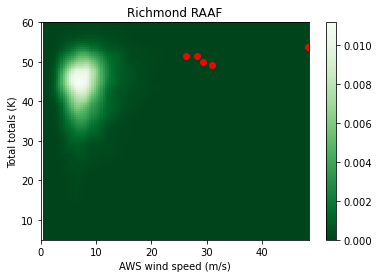

In [181]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
 
 # create data
y = ri_tot_new['ri_tot']
x = ri_tot_new['MaxHourlyGustInm_s']

 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=120
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
 #Change color palette


plt.ylim([5,60])
plt.xlim([0,48.5])
plt.ylabel('Total totals (K)')
plt.xlabel('AWS wind speed (m/s)')
plt.title('Richmond RAAF')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)
plt.colorbar()


plt.scatter(ri_scatter['MaxHourlyGustInm_s'], ri_scatter['ri_tot'], color = 'red')
plt.show()

In [182]:

from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_tot = ccf_values(ri_tot_new['ri_tot'], ri_tot_new['MaxHourlyGustInm_s'])
ccf_tot


array([ 1.29364273e-05, -4.40489901e-06, -4.49149400e-06, ...,
       -3.28477915e-05, -3.05087716e-05, -9.32894326e-06])

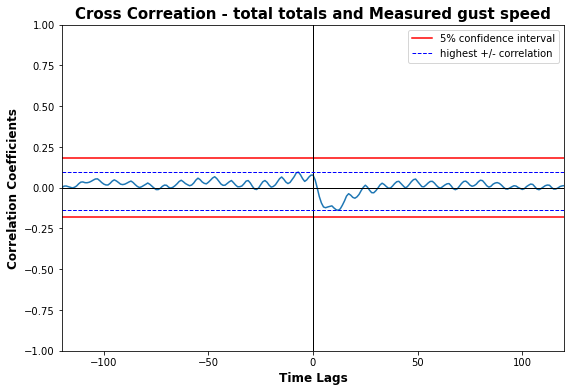

In [183]:
lags = signal.correlation_lags(len(ri_tot_new['ri_tot']), len(ri_tot_new['MaxHourlyGustInm_s']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(120), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(120), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(xlim = [-120, 120])
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation - total totals and Measured gust speed', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold',fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_tot)

KeyError: 'ri_s06'

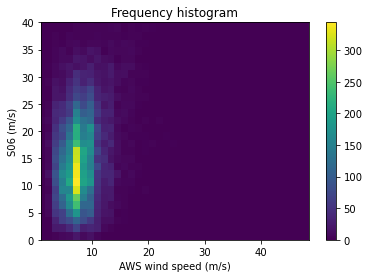

In [184]:
#plt.hexbin(x, y, bins = 50)

# Creating bins
y_min = np.min(ri_s06_new['ri_s06'])
y_max = np.max(ri_s06_new['ri_s06'])
  
x_min = np.min(ri_s06_new['MaxHourlyGustInm_s'])
x_max = np.max(ri_s06_new['MaxHourlyGustInm_s'])
  
x_bins = np.linspace(x_min, x_max, 40)
y_bins = np.linspace(y_min, y_max, 40)

h =plt.hist2d(ri_s06_new['MaxHourlyGustInm_s'], ri_s06_new['ri_s06'], bins =[x_bins, y_bins])

# cbar = plt.colorbar()

# cb_ymin = 0
# cb_ymax = 110
# cb_xmin, cb_xmax = cbar.ax.get_xlim()
# cbar.ax.set_ylim(cb_ymin, cb_ymax)
plt.colorbar()
plt.ylim([0,40])
plt.xlim([1,48.4])
plt.ylabel('S06 (m/s)')
plt.xlabel('AWS wind speed (m/s)')
plt.title('Frequency histogram')
h
plt.scatter(ri_scatter['MaxHourlyGustInm_s'], ri_scatter['ri_s06'], color = 'red')

In [193]:
ri_s06_new['MaxHourlyGustInm_s'].describe()

count    17511.000000
mean         8.001678
std          2.898665
min          0.500000
25%          6.194444
50%          7.694444
75%          9.805556
max         48.388889
Name: MaxHourlyGustInm_s, dtype: float64

/jobfs/70073792.gadi-pbs/ipykernel_1188558/3142433751.py:13: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


KeyError: 'ri_s06'

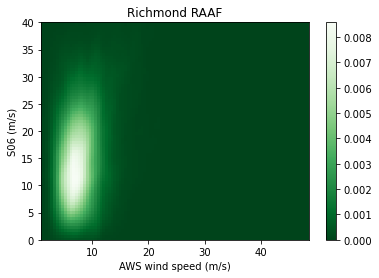

In [194]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
y = ri_s06_new['ri_s06']
x = ri_s06_new['MaxHourlyGustInm_s']

 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
 #Change color palette

plt.ylim([0,40])
plt.xlim([1,48.4])
plt.ylabel('S06 (m/s)')
plt.xlabel('AWS wind speed (m/s)')
plt.title('Richmond RAAF')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)
plt.colorbar()
plt.scatter(ri_scatter['MaxHourlyGustInm_s'], ri_scatter['ri_s06'], color = 'red')
plt.show()

The null hypothesis for the ADF test is that the series in question is not stationary. So a rejection goes in favor of the alternative hypothesis of stationarity. 
If both the p-values of both series is less than 0.05, so we can reject the null hypothesis and say the two series are stationary. Otherwise we would go ahead with detrending the data.

This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.Series(dftest[0:4], index=['Test_Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result
    
    adf_table = ri_s06_new.drop('barra_time', axis = 1)
    adf_table.apply(adf_test, axis = 0)

In [186]:
adfuller(ri_s06_new['ri_s06'])

(-13.185298283126864,
 1.17349455522146e-24,
 44,
 17466,
 {'1%': -3.4307244567346613,
  '5%': -2.861705495393627,
  '10%': -2.566858088905688},
 92535.93469551642)

In [199]:
len(ri_s06_new['ri_s06'])

17511

In [187]:
adfuller(ri_s06_new['MaxHourlyGustInm_s'])

(-15.527324057930446,
 2.243534873218311e-28,
 44,
 17466,
 {'1%': -3.4307244567346613,
  '5%': -2.861705495393627,
  '10%': -2.566858088905688},
 75329.83244440083)

So now we can go ahead and generate the cross correlation coefficients 

In [188]:
#correlation - s06 & wind speed

from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_s06 = ccf_values(ri_s06_new['ri_s06'], ri_s06_new['MaxHourlyGustInm_s'])
ccf_s06

array([ 4.72020049e-05,  2.34695441e-05, -3.00381770e-05, ...,
        7.76139965e-05,  7.30266587e-05,  5.26232916e-05])

In [214]:
ccf_s06.shape

(35021,)

Lastly, we will create a list of of our lag values and visualize it against the correlation coefficients. We will also set the confidence interval outside which the correlation coefficients becomes important.

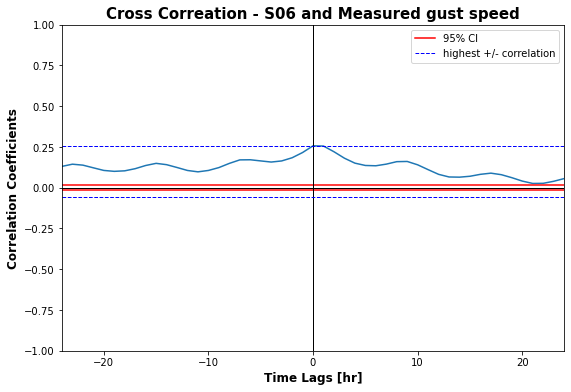

In [212]:
lags = signal.correlation_lags(len(ri_s06_new['ri_s06']), len(ri_s06_new['MaxHourlyGustInm_s']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    #ax.axhline(-2/np.sqrt(len(ri_s06_new['ri_s06'])), color='red', label='95% confidence interval')
    #ax.axhline(2/np.sqrt(len(ri_s06_new['ri_s06'])), color='red')
    ax.plot(lags, np.maximum(-1, -2 / np.sqrt(len(ri_s06_new["ri_s06"]) - lags)), color = "red", label = "95% CI")
    ax.plot(lags, np.minimum(1, 2 / np.sqrt(len(ri_s06_new["ri_s06"]) - lags)), color = "red")
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(xlim = [-24, 24])
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation - S06 and Measured gust speed', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold',fontsize = 12)
    ax.set_xlabel('Time Lags [hr]', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_s06)

In [201]:
lags

array([-17510, -17509, -17508, ...,  17508,  17509,  17510])

In [190]:
#correlation - mlcape & wind speed

from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_mlcape = ccf_values(ri_mlcape_new['mlcape'], ri_mlcape_new['MaxHourlyGustInm_s'] )
ccf_mlcape

array([ 7.89320270e-06,  1.49557781e-05,  1.62552070e-05, ...,
        7.87905492e-06, -3.13802629e-05, -4.46440966e-05])

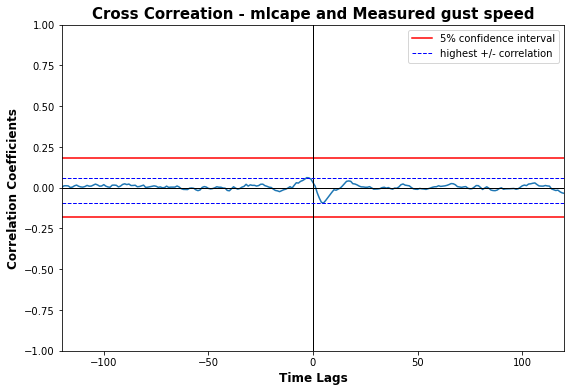

In [192]:
lags = signal.correlation_lags(len (ri_mlcape_new['mlcape']), len(ri_mlcape_new['MaxHourlyGustInm_s']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(120), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(120), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(xlim = [-120, 120])
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation - mlcape and Measured gust speed', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold',fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_mlcape)

In [103]:
new_frame_2 = test.merge(df_2,how='left', left_on='clean_time', right_on='barra_time')
new_frame_2

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,cape
0,2009,12,31,14,4,4,11.2,3.111111,2009-12-31T14:00:00,2009-12-31 14:00:00,2009-12-31 14:00:00,347.100494
1,2009,12,31,15,16,16,9.4,2.611111,2009-12-31T15:00:00,2009-12-31 15:00:00,2009-12-31 15:00:00,372.772888
2,2009,12,31,17,28,28,7.6,2.111111,2009-12-31T17:00:00,2009-12-31 17:00:00,2009-12-31 17:00:00,32.360691
3,2009,12,31,18,13,13,9.4,2.611111,2009-12-31T18:00:00,2009-12-31 18:00:00,2009-12-31 18:00:00,31.143925
4,2009,1,1,13,24,24,27.7,7.694444,2009-1-1T13:00:00,2009-01-01 13:00:00,2009-01-01 13:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4559,2019,12,29,15,5,5,9.4,2.611111,2019-12-29T15:00:00,2019-12-29 15:00:00,NaT,NaN
4560,2019,12,29,16,6,6,11.2,3.111111,2019-12-29T16:00:00,2019-12-29 16:00:00,NaT,NaN
4561,2019,12,29,17,1,1,9.4,2.611111,2019-12-29T17:00:00,2019-12-29 17:00:00,NaT,NaN
4562,2019,12,29,18,0,0,9.4,2.611111,2019-12-29T18:00:00,2019-12-29 18:00:00,NaT,NaN


In [69]:
new_frame = test.merge(df,how='left', left_on='clean_time', right_on='barra_time')
new_frame

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,mlcape
0,2009,12,31,14,4,4,11.2,3.111111,2009-12-31T14:00:00,2009-12-31 14:00:00,2009-12-31 14:00:00,347.100494
1,2009,12,31,15,16,16,9.4,2.611111,2009-12-31T15:00:00,2009-12-31 15:00:00,2009-12-31 15:00:00,372.772888
2,2009,12,31,17,28,28,7.6,2.111111,2009-12-31T17:00:00,2009-12-31 17:00:00,2009-12-31 17:00:00,32.360691
3,2009,12,31,18,13,13,9.4,2.611111,2009-12-31T18:00:00,2009-12-31 18:00:00,2009-12-31 18:00:00,31.143925
4,2009,1,1,13,24,24,27.7,7.694444,2009-1-1T13:00:00,2009-01-01 13:00:00,2009-01-01 13:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4559,2019,12,29,15,5,5,9.4,2.611111,2019-12-29T15:00:00,2019-12-29 15:00:00,NaT,NaN
4560,2019,12,29,16,6,6,11.2,3.111111,2019-12-29T16:00:00,2019-12-29 16:00:00,NaT,NaN
4561,2019,12,29,17,1,1,9.4,2.611111,2019-12-29T17:00:00,2019-12-29 17:00:00,NaT,NaN
4562,2019,12,29,18,0,0,9.4,2.611111,2019-12-29T18:00:00,2019-12-29 18:00:00,NaT,NaN


In [104]:
new_frame_2['MaxHourlyGustInm_s'].max()

15.88888888888889

In [70]:
blah = new_frame.dropna()
blah

,YearMonthDayHourMinutesInYYYY,MM_1,DD_1,HH24_1,MIFormatInUniversalCoordinatedTime,MIFormatInLocalStandardTime,MaxHourlyGustInKm_h,MaxHourlyGustInm_s,Time,clean_time,barra_time,mlcape
0,2009,12,31,14,4,4,11.2,3.111111,2009-12-31T14:00:00,2009-12-31 14:00:00,2009-12-31 14:00:00,347.100494
1,2009,12,31,15,16,16,9.4,2.611111,2009-12-31T15:00:00,2009-12-31 15:00:00,2009-12-31 15:00:00,372.772888
2,2009,12,31,17,28,28,7.6,2.111111,2009-12-31T17:00:00,2009-12-31 17:00:00,2009-12-31 17:00:00,32.360691
3,2009,12,31,18,13,13,9.4,2.611111,2009-12-31T18:00:00,2009-12-31 18:00:00,2009-12-31 18:00:00,31.143925
8,2009,1,1,17,28,28,9.4,2.611111,2009-1-1T17:00:00,2009-01-01 17:00:00,2009-01-01 17:00:00,1.239903
...,...,...,...,...,...,...,...,...,...,...,...,...
4416,2019,2,24,13,40,40,11.2,3.111111,2019-2-24T13:00:00,2019-02-24 13:00:00,2019-02-24 13:00:00,0.131550
4430,2019,2,28,13,42,42,5.4,1.500000,2019-2-28T13:00:00,2019-02-28 13:00:00,2019-02-28 13:00:00,134.694687
4431,2019,2,28,14,6,6,7.6,2.111111,2019-2-28T14:00:00,2019-02-28 14:00:00,2019-02-28 14:00:00,100.620522
4432,2019,2,28,15,35,35,5.4,1.500000,2019-2-28T15:00:00,2019-02-28 15:00:00,2019-02-28 15:00:00,95.886917


In [97]:
blah['MaxHourlyGustInm_s'].max()

14.88888888888889

(array([[1.360e+02, 1.049e+03, 6.200e+02, 2.640e+02, 5.700e+01, 6.000e+01,
         2.300e+01, 1.000e+01, 9.000e+00, 6.000e+00],
        [1.000e+00, 8.800e+01, 4.900e+01, 2.600e+01, 2.000e+00, 7.000e+00,
         2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
        [0.000e+00, 8.000e+00, 1.000e+01, 4.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

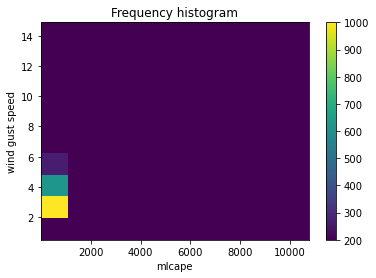

In [28]:
h =plt.hist2d(blah['mlcape'], blah['MaxHourlyGustInm_s'])
plt.colorbar(h[3])
plt.xlabel('mlcape')
plt.ylabel('wind gust speed')
plt.title('Frequency histogram')
h

(array([[1.360e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.049e+03, 8.800e+01, 8.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
        [6.200e+02, 4.900e+01, 1.000e+01, 5.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.640e+02, 2.600e+01, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [5.700e+01, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [6.000e+01, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.300e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

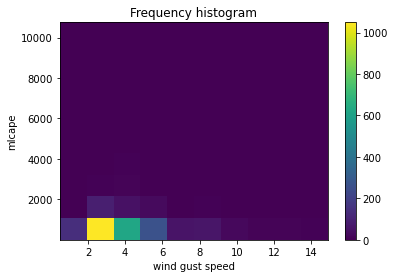

In [75]:
h =plt.hist2d(blah['MaxHourlyGustInm_s'], blah['mlcape'])
plt.colorbar(h[3])
plt.ylabel('mlcape')
plt.xlabel('wind gust speed')
plt.title('Frequency histogram')
h

(array([[48.,  0.,  0., ...,  0.,  0.,  0.],
        [36.,  0.,  0., ...,  0.,  0.,  0.],
        [24.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 9.,  0.,  0., ...,  0.,  0.,  0.],
        [ 6.,  0.,  0., ...,  0.,  0.,  0.],
        [ 7.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 0.5       ,  0.86894587,  1.23789174,  1.60683761,  1.97578348,
         2.34472934,  2.71367521,  3.08262108,  3.45156695,  3.82051282,
         4.18945869,  4.55840456,  4.92735043,  5.2962963 ,  5.66524217,
         6.03418803,  6.4031339 ,  6.77207977,  7.14102564,  7.50997151,
         7.87891738,  8.24786325,  8.61680912,  8.98575499,  9.35470085,
         9.72364672, 10.09259259, 10.46153846, 10.83048433, 11.1994302 ,
        11.56837607, 11.93732194, 12.30626781, 12.67521368, 13.04415954,
        13.41310541, 13.78205128, 14.15099715, 14.51994302, 14.88888889]),
 array([1.00000001e-01, 2.75833288e+02, 5.51566577e+02, 8.27299865e+02,
        1.10303315e+03, 1.37876644e+03, 1.65449973e+03, 1

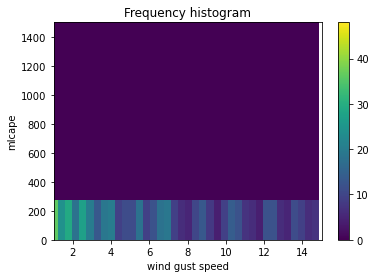

In [92]:
#plt.hexbin(x, y, bins = 50)

# Creating bins
y_min = np.min(blah['mlcape'])
y_max = np.max(blah['mlcape'])
  
x_min = np.min(blah['MaxHourlyGustInm_s'])
x_max = np.max(blah['MaxHourlyGustInm_s'])
  
x_bins = np.linspace(x_min, x_max, 40)
y_bins = np.linspace(y_min, y_max, 40)

h =plt.hist2d(blah['mlcape'], blah['MaxHourlyGustInm_s'],bins =[x_bins, y_bins])
plt.colorbar()
plt.ylim([0,1500])
plt.xlim([1,15])
plt.ylabel('mlcape')
plt.xlabel('wind gust speed')
plt.title('Frequency histogram')
h

In [22]:
#ri_winddata = df3.to_xarray()

In [25]:
# new_time = bb_new.drop_vars('index')
# new_time

(array([[1.360e+02, 1.049e+03, 6.200e+02, 2.640e+02, 5.700e+01, 6.000e+01,
         2.300e+01, 1.000e+01, 9.000e+00, 6.000e+00],
        [1.000e+00, 8.800e+01, 4.900e+01, 2.600e+01, 2.000e+00, 7.000e+00,
         2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
        [0.000e+00, 8.000e+00, 1.000e+01, 4.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

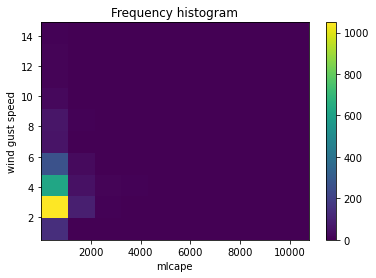

In [76]:
h =plt.hist2d(blah['mlcape'], blah['MaxHourlyGustInm_s'])
plt.colorbar(h[3])
plt.xlabel('mlcape')
plt.ylabel('wind gust speed')
plt.title('Frequency histogram')
h

/jobfs/69278434.gadi-pbs/ipykernel_1375873/2152632935.py:27: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


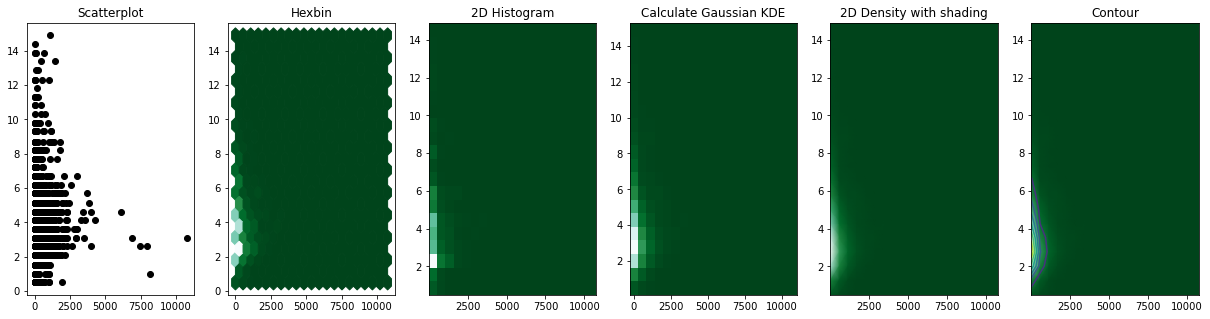

In [48]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

x = blah['mlcape']
y = blah['MaxHourlyGustInm_s']


 
 #Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

/jobfs/69278434.gadi-pbs/ipykernel_1372567/335294673.py:13: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


AttributeError: 'Figure' object has no attribute 'get_array'

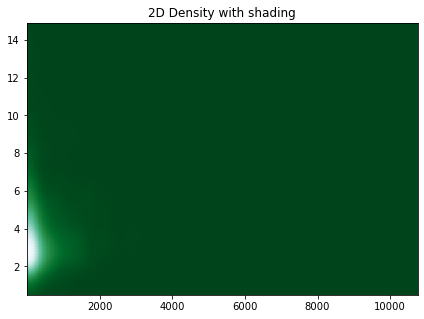

In [91]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

x = blah['mlcape']
y = blah['MaxHourlyGustInm_s']
 
 #Create a figure with 6 plot areas
fig, axes = plt.subplots(figsize=(7, 5))
nbins = 100
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


# add shading
axes.set_title('2D Density with shading')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
plt.colorbar(fig, k)

(array([[ 1.,  0.,  0.,  2.,  2.,  5.,  2.,  2.,  6., 10.,  7.,  3.,  2.,
          3.,  0.,  3.,  0.,  4.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
          1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

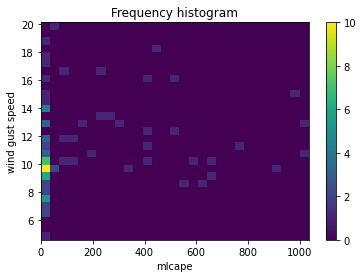

In [175]:
#plt.hexbin(x, y, bins = 50)

# Creating bins
x_min = np.min(combined['ri_mlcape'])
x_max = np.max(combined['ri_mlcape'])
  
y_min = np.min(combined['station_speed'])
y_max = np.max(combined['station_speed'])
  
x_bins = np.linspace(x_min, x_max, 30)
y_bins = np.linspace(y_min, y_max, 30)

h =plt.hist2d(combined['ri_mlcape'], combined['station_speed'],bins =[x_bins, y_bins])
plt.colorbar()
plt.xlabel('mlcape')
plt.ylabel('wind gust speed')
plt.title('Frequency histogram')
h

(array([[ 1.,  0.,  2.,  7.,  2.,  2., 18., 10.,  2.,  3.,  3.,  4.,  1.,
          1.,  1.,  1.,  1.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,

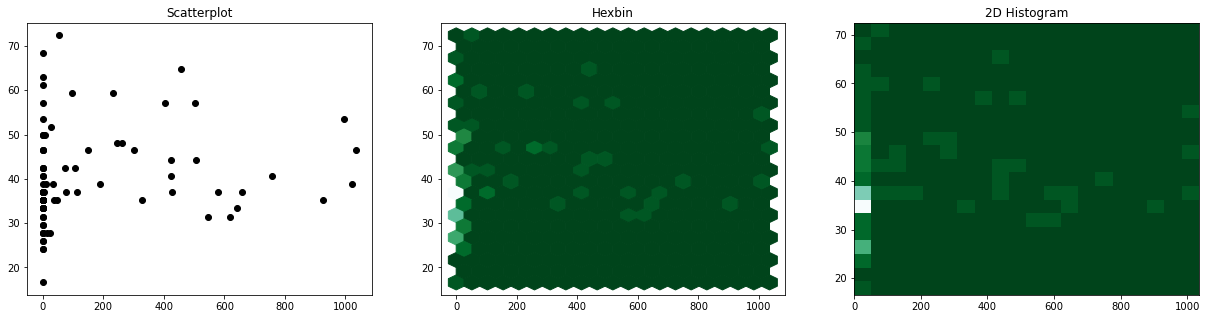

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(21, 5))

# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(combined['ri_mlcape'], combined['station_speed'], 'ko')
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(combined['ri_mlcape'], combined['station_speed'], gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(combined['ri_mlcape'], combined['station_speed'], bins=nbins, cmap=plt.cm.BuGn_r)
 


/jobfs/69278434.gadi-pbs/ipykernel_1375873/3049263539.py:26: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde(data.T)


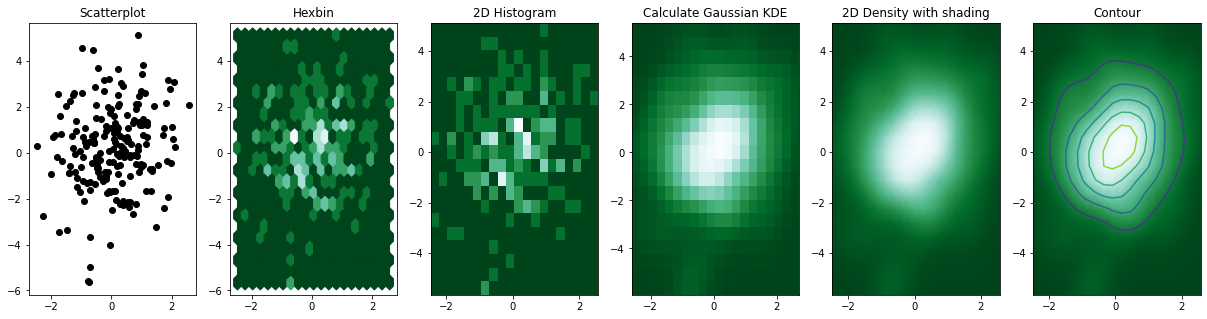

In [41]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

array([ 1.31338214e+00,  3.01940151e-01, -1.67051365e+00,  1.27584480e+00,
       -1.68094469e-01,  2.06978940e+00,  4.23370991e-01, -1.90193581e-01,
       -1.19899645e-01, -5.57911883e+00,  2.13876707e+00, -2.25445955e+00,
       -1.71836844e+00,  1.10427032e+00, -1.00833859e+00, -2.74557031e+00,
        1.85318103e-01,  2.24072295e-02,  2.59002525e+00, -1.16001234e-01,
       -3.62356867e-01, -1.62533937e+00, -1.92069475e+00, -5.19707506e-01,
        3.86236035e-01,  4.67685652e-01,  1.30845150e+00,  4.49849993e-01,
        1.09309227e-01,  3.69109869e+00, -4.03861585e+00,  3.82257468e+00,
        2.84612193e+00,  9.23617817e-01,  9.65331024e-01, -3.93977985e-01,
        3.21932327e+00,  1.62304645e+00,  1.99247057e+00,  6.10263272e-01,
       -1.24243774e+00, -2.08808211e+00, -3.79421828e-01,  2.81564083e-01,
        1.61253163e+00, -3.43681309e+00, -8.49841816e-01, -1.27986234e-01,
        2.10660394e-01, -8.60300832e-01,  2.13362693e+00, -1.65174652e+00,
        8.78993022e-01,  